¡Hola, Daniela!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Daniela! Has hecho un excelente trabajo, cada vez más cercas de convertirte en una analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

In [2]:
#importar librerías necesarias
import pandas as pd
import numpy as np
from math import factorial 
from scipy import stats as st
import math as mt
import seaborn as sns

In [3]:
#cargar datos
df = pd.read_csv('//datasets/games.csv',delimiter:=',')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Primeramente se nota la presencia de valores nulos, especialmente para las columnas 'user_score', 'critic_score' y 'rating'. 
Los tipos de datos son string o flotantes, y los valores nulos para columnas tipo flotante se pueden remplazar por promedio o media.
Sin embargo Rating tiene demasiados valores nulos para remplazarlos con Unknown

In [5]:
#Cambiar nombres
df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                   'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales',
                   'Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score',
                   'Rating':'rating'},inplace='True')


<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo transformando el nombre de las columnas, para futuras ocaciones puedes hacer uso de: 

    df.columns.str.lower()
    
</div>

In [6]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
#investigar duplicados (no hay yay)
print(df.duplicated().sum())
print(df.sample(5))

0
                                name platform  year_of_release    genre  \
3963            Test Drive Unlimited      PSP           2007.0   Racing   
11897         Combat: Task Force 121       XB           2005.0  Shooter   
11550             Get Fit with Mel B     X360              NaN   Sports   
13092  The Bureau: XCOM Declassified       PC           2013.0  Shooter   
4487                        Bionicle      PS2           2003.0   Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
3963       0.08      0.27       0.0         0.15          80.0        7.3   
11897      0.05      0.02       0.0         0.00          44.0        8.5   
11550      0.00      0.06       0.0         0.01          57.0        NaN   
13092      0.00      0.05       0.0         0.00          66.0        6.5   
4487       0.21      0.17       0.0         0.06          51.0        3.6   

      rating  
3963    E10+  
11897      M  
11550      E  
13092      M  
4487     

In [8]:
#usar unique para entender mejor los tipos de datos
print(df['name'].unique())	
print(df['platform'].unique())
print(df['year_of_release'].unique())	
print(df['genre'].unique())
print(df['na_sales'].unique())
print(df['eu_sales'].unique())
print(df['jp_sales'].unique())
print(df['other_sales'].unique())
print(df['critic_score'].unique())
print(df['user_score'].unique())	
print(df['rating'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.

Sales: Los sales estan en notación científica. 
Rating:ka y e de everyone es lo mismo.
Aquellos valores tipo string que no representan tan gran porcentaje de valores nulos respecto al total pueden ser remplazados con 'unknown' mientras que las calificaciones pueden ser remplazadas por promedio o mediana.
Un score esta en object y el otro en float, es mejor dejarlos en float para remplazar nan.

In [9]:
df = df.copy()

#cambiar types y remplazar ausentes que no son númericos
df['name'] = df['name'].fillna('unknown')
#años de float a numerico (no vale a pena a datetime porque no hay meses ni dias)
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce') 
df = df[np.isfinite(df['year_of_release'])]
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')
#correccion de juego con año incorrecto
#encontrar indice
condition_error = (df['platform'] == 'DS') & (df['year_of_release']==1985)
#cambiar el año
df.loc[condition_error,'year_of_release'] = 2007
#remplazar valores ausentes en genre
df['genre'] = df['genre'].fillna('unknown')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


Se debe remplezar los NaN antes de cambiar el type de la columna
Para decidir cual remplazo es mejor (media o mediana) es mejor hacer un histograma para entender la distribución de los datos. Los valores que no son calificaciones (NaN y tbd) son casi la mitad de los datos,
pero igual elijo remplazarlos con la mediana.

In [10]:
#calcular la cantidad de veces que aparece tbd en la columna de user_score
print(df['user_score'][df['user_score']=='tbd'].value_counts())
df['user_score'].isna().sum()

tbd    2376
Name: user_score, dtype: int64


6607

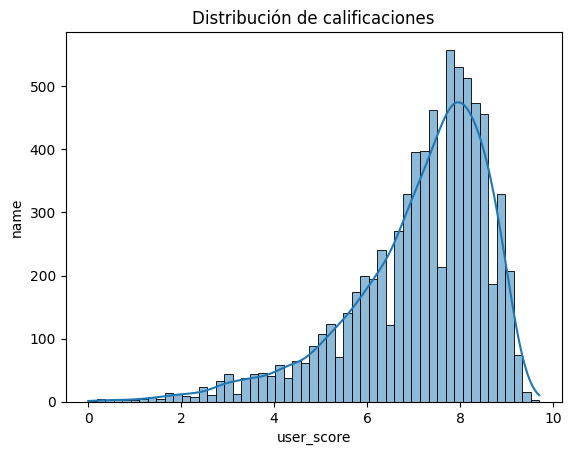

In [11]:
df = df.copy()
import seaborn as sns
import matplotlib.pyplot as plt
#hacer el cambio forzosamente de type a numerico para poder graficar y así usar el mejor
#métodos estadístico para remplazar los NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#el kde es la linea q le da fluidez al histograma
sns.histplot(df['user_score'], kde=True)
plt.title('Distribución de calificaciones')
plt.xlabel('user_score')
plt.ylabel('name')
plt.show()


Hay una distribución sesgada hacia la izquierda, con una concentración en calificaciones altas. Por lo que es
mejor hacer remplazar con la mediana.

In [12]:
#remplazar NaN con la mediana 
median_user_score = df['user_score'].median()
print(median_user_score)
df['user_score'] = df['user_score'].fillna(median_user_score)
print(df['user_score'].unique())

7.5
[8.  7.5 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8 6.9
 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5 4.4
 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5 2.1
 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3 0.2
 0.6 1.4 0.9 1.  9.7]


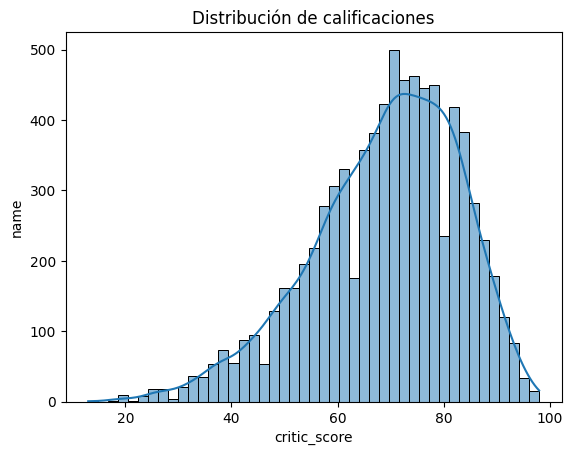

In [13]:
sns.histplot(df['critic_score'], kde=True)
plt.title('Distribución de calificaciones')
plt.xlabel('critic_score')
plt.ylabel('name')
plt.show()

In [14]:
#remplazar NaN con la mediana 
median_critic_score = df['critic_score'].median()
print(median_critic_score)
df['critic_score'] = df['critic_score'].fillna(median_critic_score)
print(df['user_score'].unique())

71.0
[8.  7.5 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8 6.9
 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5 4.4
 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5 2.1
 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3 0.2
 0.6 1.4 0.9 1.  9.7]


In [15]:
#remplazazar valores NaN de Rating
print(df['rating'][df['rating']=='tbd'].value_counts())
df['rating'].isna().sum()

Series([], Name: rating, dtype: int64)


6678

In [16]:
#como es numero podriamos remplazarlo con 'unknown'
df['rating'] = df['rating'].fillna('unknown')
#comprobación
print(df['rating'].value_counts(dropna=False))

unknown    6678
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64


¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles?
Yo asumo que para las calificaciones, en aspecto de critic_score el juego no tiene tanto impacto como para 
tener calificaciones de criticos, y para el caso de users, hay una gran población de usuarios que no califican
los juegos. 
Después de haber investigado los juegos con la abreviatura TBD en calificaciones se da porque los juegos aún 
han salido. Sin embargo si los se necesita hacer analisis que incluyan todas las columnas, si es util mantener esas columnas con la mediana, pero si se van a hacer análisis respecto a las calificaciones usar la mediana en vez de NaN causaría ruido artificial.

In [17]:
#Calculo de ventas totales
#como son análisis financieros escojo no redondear los decimales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas  cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



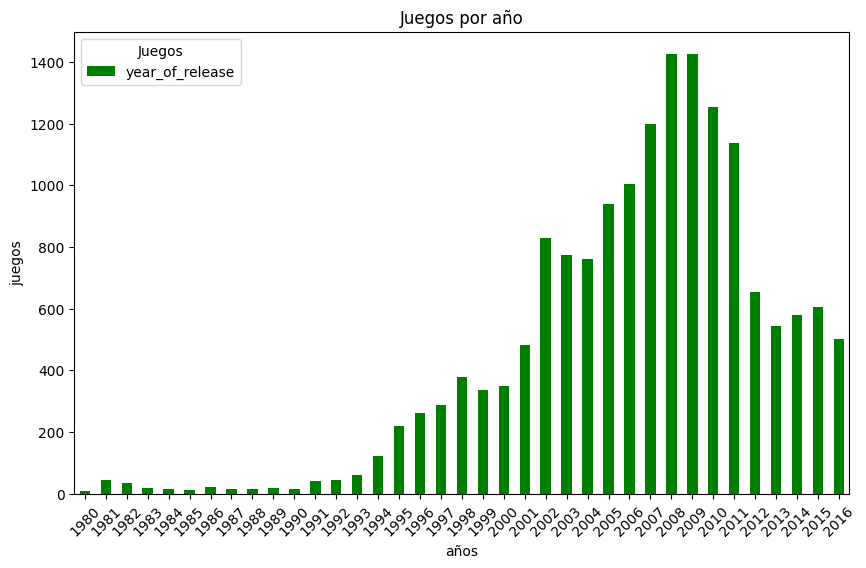

In [18]:
#juegos lanzados por año
#juegos por año
conteo_por_año = df['year_of_release'].value_counts().sort_index()
#agregar al df 
df['juegos_por_año'] = df['year_of_release'].map(conteo_por_año)
#creando una nueva columna en tu DataFrame llamada 'Juegos_por_año',
#y en cada fila, mapea (traduce) el valor del año ('Year') al número total de juegos que salieron ese mismo año, según lo que diga conteo_por_año.
#graficar para ver datos significativos
conteo_por_año.plot(kind='bar',color=['green'], figsize = (10,6))

plt.title('Juegos por año')
plt.xlabel('años')
plt.ylabel('juegos')
plt.xticks(rotation=45)
plt.legend(title='Juegos')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Según la gráfica se logra notar un aumento en la producción de juegos desde los 90s, teniendo como pico la decada de los 00's e incluso manteniendose alta en los siguientes años después del 2011. Con los años 2008 y 2009 con la mayor cantidad de juegos. Los periodos con datos más significativos son desde 1998 hasta 2016.

<function matplotlib.pyplot.show(close=None, block=None)>

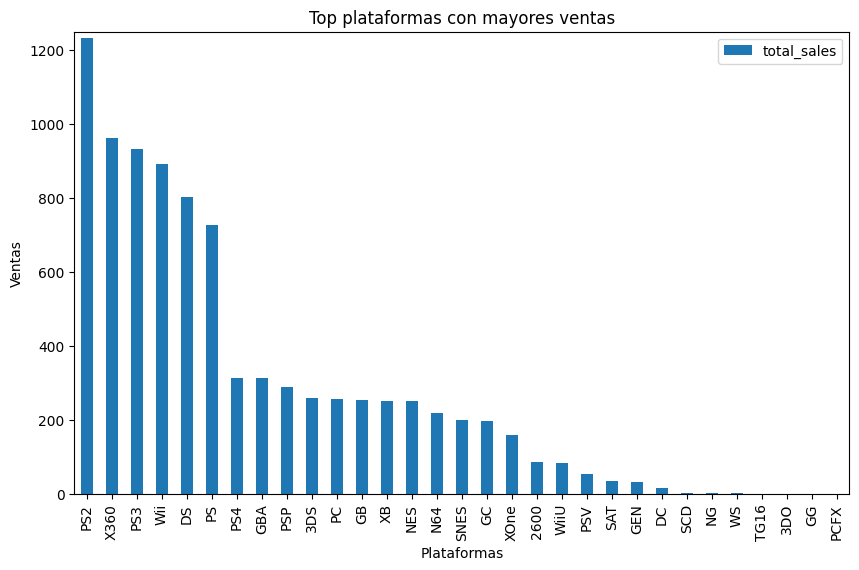

In [19]:
#debo sumar tambien años para poder identificar las plataformas top
sales_between_platforms = df.groupby(['platform'])['total_sales'].sum().reset_index()

#arreglo del df de mayor a menor en ventas
sorted_sales = sales_between_platforms.sort_values(by='total_sales', ascending= False)

#top ventas
top_sales_per_platform = sorted_sales.head(40)

#graficar
top_sales_per_platform.plot(title='Top plataformas con mayores ventas',                      
                        x='platform',
                        y='total_sales',
                        figsize=[10,6],
                        xlim=(0,40),
                        ylim=(0,1250),
                        xlabel='Plataformas',
                        ylabel='Ventas',  
                        kind='bar')

plt.show

Observa cómo varían las ventas de una plataforma a otra.¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables. Las plataformas top son PS2, X360, WII, DS PS, PS4. Los lideres en ventas son sony, microsoft con playstation y microsfot con xbox y nintendo. Mientras que las consolas mas viejas como el gameboy y el psp decaen con el tiempo.

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

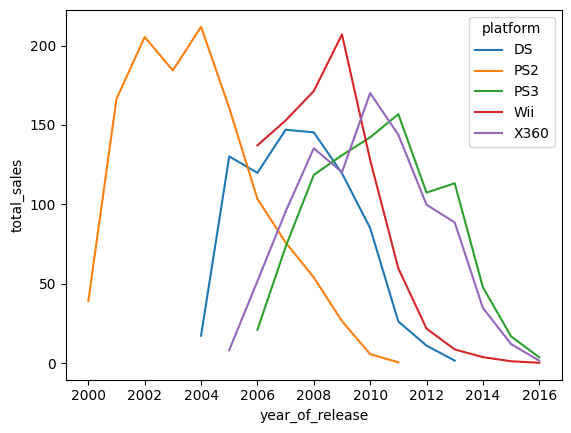

In [20]:
#Para encontrar cuanto tardan las plataformas en aparecer y desaparecer creo que lo mejor es
#hacer dos graficas temporales de las mejores con grafica de linea.
#filtrar plataformas top
top_platforms = ['PS2','X360','PS3','Wii','DS']
filtered_df_top = df[df['platform'].isin(top_platforms)]

#agrupar
sales_through_years_top = filtered_df_top.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

    #graficar

sns.lineplot(data=sales_through_years_top, x='year_of_release',y='total_sales',hue='platform')


Visulizando la gráfica se nota un error con DS con juegos estrenados en 1985, según investigación ese juego es de 2007 y hay q corregirlo. Se corregirá en la linea de código No.107

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

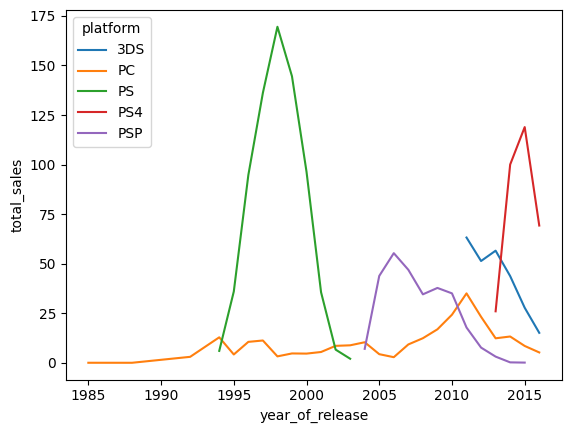

In [21]:
#mismo proceso para antiguos
bottom_platforms = ['PS','PS4','PSP','3DS','PC']
filtered_df_bottom = df[df['platform'].isin(bottom_platforms)]
#agrupar
sales_through_years_bottom = filtered_df_bottom.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

    #graficar

sns.lineplot(data=sales_through_years_bottom, x='year_of_release',y='total_sales',hue='platform')

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Aproximadamente tardan 10 años la mayoria de plataformas con mayores ventas dentro del grupo, 
Con excepciones como la pc que se mejora a la misma medida de los juegos o el psp que se volvió obsoleto.

   platform  total_sales
0      2600        86.48
1       3DO         0.10
2       3DS       257.81
3        DC        15.95
4        DS       802.78
5        GB       254.43
6       GBA       312.88
7        GC       196.73
8       GEN        30.77
9        GG         0.04
10      N64       218.01
11      NES       251.05
12       NG         1.44
13       PC       255.76
14     PCFX         0.03
15       PS       727.58
16      PS2      1233.56
17      PS3       931.34
18      PS4       314.14
19      PSP       289.53
20      PSV        53.81
21      SAT        33.59
22      SCD         1.86
23     SNES       200.04
24     TG16         0.16
25       WS         1.42
26      Wii       891.18
27     WiiU        82.19
28     X360       961.24
29       XB       251.57
30     XOne       159.32


<AxesSubplot:>

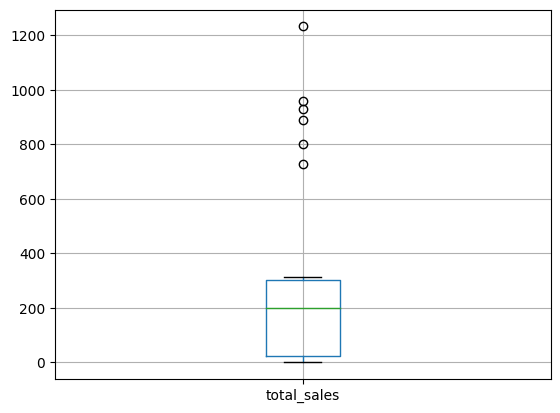

In [22]:
print(sales_between_platforms)
sales_between_platforms.boxplot(
    column='total_sales'
)


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

En promedio las plataformas venden 200 (dolares?)
Si hay vaios valores atipicos a considerar, como valores extremos de entre 600 y 900 que pueden pertenecer a consolas muy exitosas como lo son de ps2 y xbox360.

<function matplotlib.pyplot.show(close=None, block=None)>

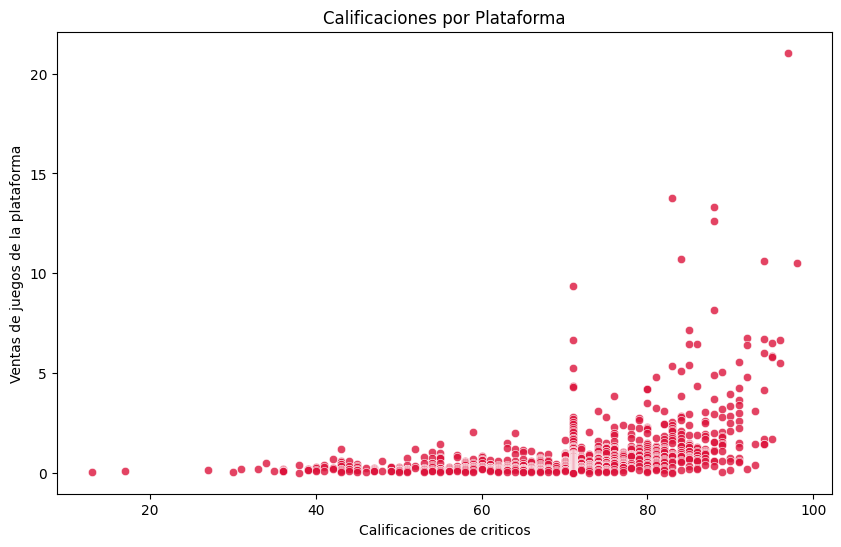

In [23]:
#tratar de filtrar el df segun indexacion logica
platform = df['platform']
ps3_platform = platform == 'PS3'
ps3_df = df[ps3_platform]

#graficar critic_score
ps3_filtrado = ps3_df[['critic_score','total_sales']]
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps3_filtrado,y='total_sales',x='critic_score', color='crimson',alpha=0.8)
#etiquetas de titulo
plt.title('Calificaciones por Plataforma')
plt.ylabel('Ventas de juegos de la plataforma')
plt.xlabel('Calificaciones de criticos')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

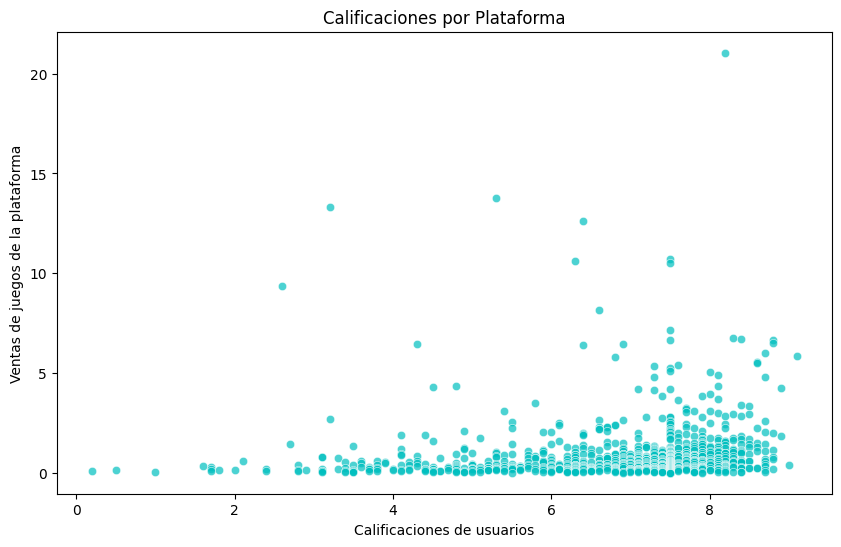

In [24]:
#graficar user_score
ps3_filtrado = ps3_df[['user_score','total_sales']]
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps3_filtrado,y='total_sales',x='user_score', color='#00BFBF',alpha=0.7)
#etiquetas de titulo
plt.title('Calificaciones por Plataforma')
plt.ylabel('Ventas de juegos de la plataforma')
plt.xlabel('Calificaciones de usuarios')
plt.show

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

Segun las gráficas, se puede interpretar que más allá de el tipo de calififcación, en realidad los juegos con mayor cantidad de calificaciones. Lo que puede significar que la relación es cuantitativa más no cualitativa.falt

<function matplotlib.pyplot.show(close=None, block=None)>

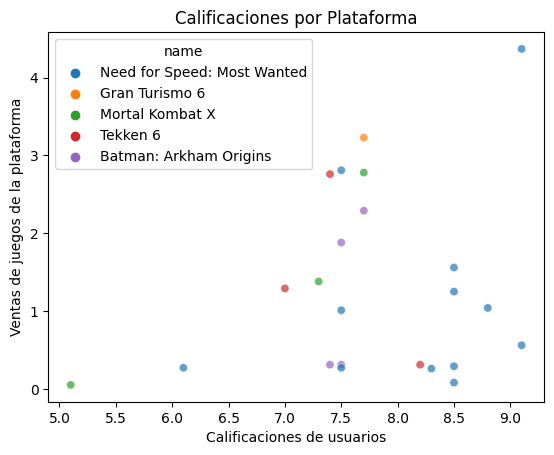

In [25]:
#comparar mismos juegos en otras plataformas
#filtrar juegos a comparar con ventas y calificaciones por indexacion logica
games_to_compare = df['name']
titles = [
    'Need for Speed: Most Wanted','Gran Turismo 6','Mortal Kombat X','Tekken 6','Batman: Arkham Origins']
name_game = games_to_compare.isin(titles)
name_df = df[name_game]

#graficar user_score
games_to_compare_filtrado_user = name_df[['user_score','total_sales']]
sns.scatterplot(data=name_df,y='total_sales',x='user_score', hue='name',alpha=0.7)
#etiquetas de titulo
plt.title('Calificaciones por Plataforma')
plt.ylabel('Ventas de juegos de la plataforma')
plt.xlabel('Calificaciones de usuarios')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

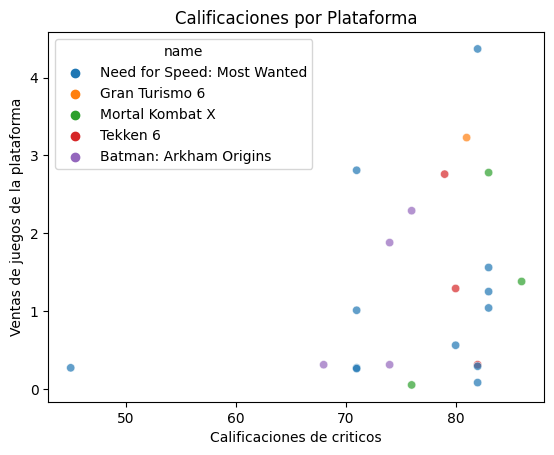

In [26]:
#graficar critic score
games_to_compare_filtrado = name_df[['critic_score','total_sales']]
sns.scatterplot(data=name_df,y='total_sales',x='critic_score',hue='name',alpha=0.7)
#etiquetas de titulo
plt.title('Calificaciones por Plataforma')
plt.ylabel('Ventas de juegos de la plataforma')
plt.xlabel('Calificaciones de criticos')
plt.show

Observando las dos gráficas (las cuales nos permiten observar las dos variables de las críticas, en gráficas independientes) podemos apreciar que existe un determinismo marcado por una mayor calificación, que se relaciona directamente con un mayor número de ventas, de manera independiente a las plataformas; este determinismo parece ser ligeramente mpas marcado en las críticas de los usuarios, tanto hacia lo positivo (buenas calificaciones) como lo negativo (malas calificaciones) dando como resultado que los juegos que tienden a obtener mejores puntajes de los usuarios, tienen un mejor desempeño en ventas, directamente correlacional también a la cantidad de ventas de la plataforma correspondiente.

           genre  name
0         Action  3307
10        Sports  2306
3           Misc  1721
7   Role-Playing  1481
8        Shooter  1296
1      Adventure  1293
6         Racing  1226
4       Platform   878
9     Simulation   857
2       Fighting   837
11      Strategy   673
5         Puzzle   569
12       unknown     2


<function matplotlib.pyplot.show(close=None, block=None)>

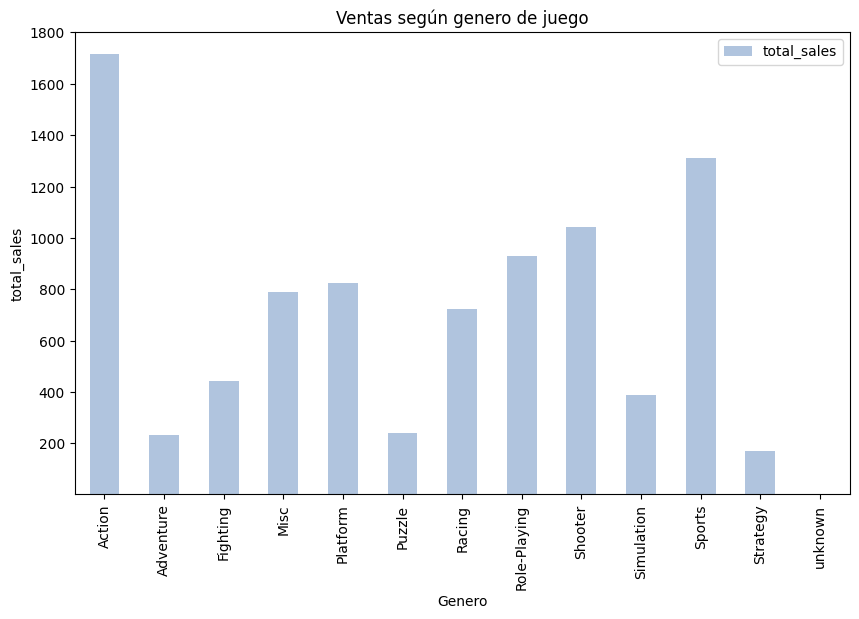

In [27]:
#cantidad de juegos por genero
genre_quantity = df.groupby(['genre'])['name'].count().reset_index().sort_values(by='name',ascending=False)
print(genre_quantity)
genre_games = df.groupby(['genre'])['total_sales'].sum().reset_index()
#graficar
genre_games.plot(kind='bar',
                 title='Ventas según genero de juego',
                 x='genre',
                 y='total_sales',
                 figsize=[10,6],
                 xlim=(0,12),
                 ylim=(2,1800),
                 xlabel='Genero',
                 ylabel='total_sales',
                 color='lightsteelblue'
                )
plt.show

Los géneros más rentables son de acción, deportes, disparos, juego de rol, juego de plataforma y juegos de categoría mezclada. Al organizar la cantidad de juegos por género, se denota el favoritismo por estos juegos, los que más se venden son los que más se crean.

          na_sales  eu_sales  jp_sales  total_sales_top_platforms
platform                                                         
DS          380.31    188.41    175.02                     743.74
PS2         572.92    332.63    137.54                    1043.09
PS3         390.13    327.21     79.41                     796.75
Wii         486.87    258.32     68.28                     813.47
X360        595.74    268.32     12.30                     876.36


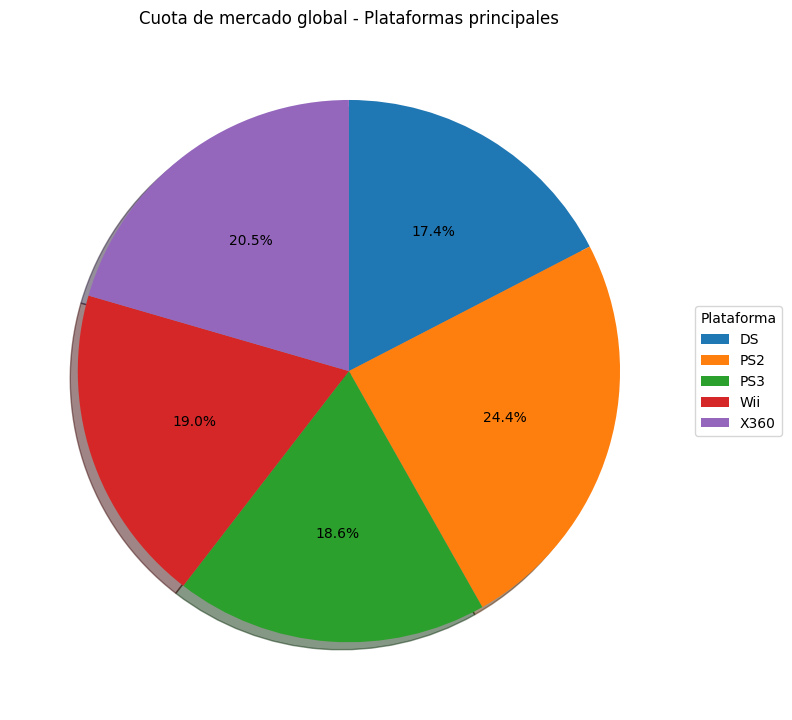

In [28]:
#Perfil de usuario
#Ventas por region
#top_platforms = ['PS2','X360','PS3','Wii','DS']

#ver como las ventas se comportan segun cada region (por top de plataformas)
cuotas_top_plataformas = filtered_df_top.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

#verificar la informacion haciendo el respectivo top pero con todas las plataformas
cuotas_todas_plataformas = df.groupby('platform')[['na_sales','eu_sales','jp_sales','total_sales']].sum()
cuotas_todas_plataformas_sorted = cuotas_todas_plataformas.sort_values(by='total_sales',ascending=False)
#si son las mismas plataformas
#variaciones
cuotas_top_plataformas['total_sales_top_platforms'] = cuotas_top_plataformas['na_sales'] + cuotas_top_plataformas['eu_sales'] + cuotas_top_plataformas['jp_sales'] 
print(cuotas_top_plataformas)
#graficar
cuotas_top_plataformas['total_sales_top_platforms'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    shadow=True,
    labeldistance=None,
    figsize=(8, 8)  # Aquí defines el tamaño directamente
)

plt.title('Cuota de mercado global - Plataformas principales')
plt.ylabel('')
plt.legend(title='Plataforma', labels=cuotas_top_plataformas.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

In [29]:
#filtrar df de t segun genero
ventas_por_genero = df.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
#sacar top cinco de cada region
top5_na = ventas_por_genero['na_sales'].sort_values(ascending=False).head(5)
top5_eu = ventas_por_genero['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = ventas_por_genero['jp_sales'].sort_values(ascending=False).head(5)
print(top5_na)
print(top5_eu)
print(top5_jp)

genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Para la región norteamérica predomina el mismo top mundial, acción seguido de deportes, tiroteo y plataforma.
Para Europa es bastante parecido pero con un poco de variación por géneros como carreras y juegos versatiles.
Mientras que japón si mantiene gustos más diferentes por el roleplay.

In [30]:
#filtrar df segun rating y ventas
ventas_por_rating = df.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
print(ventas_por_rating)

         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1274.24    703.87    197.96
E10+       345.50    183.35     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          742.89    480.00     63.58
RP           0.00      0.03      0.00
T          747.60    421.79    150.70
unknown   1227.62    610.18    836.77


Los juegos "unknown" son un porcentaje demasiado grande como para ignorarlos al momento de ver como el rating 
afecta las ventas por region, por eso usaremos arbol de decisiones para predecir ratings y remplazarlos.

In [31]:
#importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [32]:
#preparar los datos
# Clasificaciones válidas
clasificaciones_validas = ['E', 'E10+', 'T', 'M', 'AO', 'EC','K-A','RP']

# Juegos con rating conocido
df_train = df[df['rating'].isin(clasificaciones_validas)].copy()
X_train = df_train[['genre', 'platform', 'year_of_release']]
y_train = df_train['rating']

# Juegos sin rating
df_unknown = df[df['rating'] == 'unknown'].copy()
X_unknown = df_unknown[['genre', 'platform', 'year_of_release']]

In [33]:
#crear pipeline de preprocesamiento + modelo
# Columnas categóricas
categorical_features = ['genre', 'platform']
numeric_features = ['year_of_release']

# Codificador para columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # deja pasar year_of_release sin modificar
)

# Pipeline completo: preprocesamiento + modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [34]:
#entrenar al modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['genre', 'platform'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [35]:
#predecir ratings para juegos 'unknown'
predicted_ratings = pipeline.predict(X_unknown)

# Asignar predicciones al DataFrame original
df.loc[df['rating'] == 'unknown', 'predicted_rating'] = predicted_ratings

In [36]:
#muestra con 'unknown'
df[df['rating'] == 'unknown'][['name', 'genre', 'platform', 'predicted_rating']].head(10)

,name,genre,platform,predicted_rating
1,Super Mario Bros.,Platform,NES,T
4,Pokemon Red/Pokemon Blue,Role-Playing,GB,T
5,Tetris,Puzzle,GB,E
9,Duck Hunt,Shooter,NES,E
10,Nintendogs,Simulation,DS,E
12,Pokemon Gold/Pokemon Silver,Role-Playing,GB,T
18,Super Mario World,Platform,SNES,T
20,Pokemon Diamond/Pokemon Pearl,Role-Playing,DS,E10+
21,Super Mario Land,Platform,GB,T
22,Super Mario Bros. 3,Platform,NES,T


In [37]:
#mismo análisis pero con la nueva predicción
#crear nuevo df con el remplazo de predicción
# Crear una nueva columna que use el rating original si existe, o el predicho si era unknown
df['rating_final'] = df['rating']
df.loc[df['rating'] == 'unknown', 'rating_final'] = df.loc[df['rating'] == 'unknown', 'predicted_rating']

ventas_por_rating_final = df.groupby('rating_final')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(ventas_por_rating_final)

              na_sales  eu_sales  jp_sales
rating_final                              
AO                1.26      0.61      0.00
E              1867.96   1002.11    518.77
E10+            415.84    226.68    126.12
EC                1.53      0.13      0.00
K-A              26.87     13.76     24.82
M               908.49    565.74    125.23
RP                0.00      0.03      0.00
T              1121.25    591.15    495.73


In [38]:
toprating_na = ventas_por_rating_final['na_sales'].sort_values(ascending=False).head(5)
toprating_eu = ventas_por_rating_final['eu_sales'].sort_values(ascending=False).head(5)
toprating_jp = ventas_por_rating_final['jp_sales'].sort_values(ascending=False).head(5)
print(toprating_na)
print(toprating_eu)
print(toprating_jp)

rating_final
E       1867.96
T       1121.25
M        908.49
E10+     415.84
K-A       26.87
Name: na_sales, dtype: float64
rating_final
E       1002.11
T        591.15
M        565.74
E10+     226.68
K-A       13.76
Name: eu_sales, dtype: float64
rating_final
E       518.77
T       495.73
E10+    126.12
M       125.23
K-A      24.82
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

Una vez remplazados los rating por predicción notamos que los ratings de juegos que mas afectan las ventas son adult only,early child y role_playing. Lo que podría ilustrar que los juegos que más garantizan ventas son aquellos que son más aptos para todo público. Sin embargo no parece cambiar mucho según la región. Lo que significa que las poblaciones de consumidores en cuestión de edad son muy similares.

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
H0 = promedio ['user_score'] Xbox = promedio ['user_score'] PC
H1 = promedio ['user_score']Xbox diferente a promedio ['user_score'] PC

Hipotesis Nula = Las varianzas son iguales
Hipotesis Alternativa = Las varianzas son diferentes
Como la hipotesis es de diferencias en promedio, es necesario analizar si las dos varianzas son iguales o desiguales, usé un levene más breve esta vez y como dio más del p_value necesario para demostrar que las varianzas son diferentes se puede rechazar la hipotesis nula y seguir con el t_student

In [39]:
import scipy.stats as stats
import numpy as np
alpha = 0.05
#Que tipo de hipotesis es? dos colas
#Usar Welchs o t de student?
xbos_user_score = df[df['platform']=='XOne']['user_score']
pc_user_score = df[df['platform']=='PC']['user_score']

mean_xbox = xbos_user_score.mean()
mean_pc = pc_user_score.mean()
levene_Stat, levene_p_value = stats.levene(xbos_user_score,pc_user_score)
print(levene_p_value)

0.9598032879564389


In [40]:
from scipy.stats import ttest_ind
#prueba t de student
#H0 = LOS PROMEDIOS DE CALIFICACIONES SON IGUALES (XONE = PC)
#HA = LOS PROMEDIOS DE CALIFICACIONES SON IGUALES (XONE DIF PC)

t_stat, p_value = ttest_ind(xbos_user_score, pc_user_score, equal_var=True)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

#interpretacion
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: la diferencia entre los grupos no es significativa.")

t = -3.928, p = 0.000
Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.


Conclusión : Los promedios de calificaciones de usuarios de Xbox y Pc son diferentes. El valor es negativo lo que se puede interpretar como que las calificaciones de xOne son más bajas que PC.

Las calificaciones promedio de los usuarios para los juegos de género Acción y Deportes son las mismas.
H0 = promedio ['user_score'] Acción = promedio ['user_score'] Deportes H1 = promedio ['user_score'] Acción diferente a promedio ['user_score'] Deportes.

In [43]:
#Usar Welchs o t de student?
action_user_score = df[df['genre']=='Action']['user_score']
sports_user_score = df[df['genre']=='Sports']['user_score']

mean_action = action_user_score.mean()
mean_sports = sports_user_score.mean()
levene_Stat, levene_p_value = stats.levene(action_user_score,sports_user_score)
print(levene_p_value)

0.7767246731839648


In [44]:
#prueba t de student
#H0 = LOS PROMEDIOS DE CALIFICACIONES SON IGUALES (ACTION = SPORTS)
#HA = LOS PROMEDIOS DE CALIFICACIONES SON IGUALES (ACTION DIF SPORTS)

t_stat, p_value = ttest_ind(action_user_score, sports_user_score, equal_var=True)
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

#interpretacion
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: la diferencia entre los grupos no es significativa.")

t = 0.575, p = 0.565
No podemos rechazar la hipótesis nula: la diferencia entre los grupos no es significativa.


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Además, lo complementas con la prueba de levene para mostrar el supuesto de varianzas iguales. 

Conclusión: Los promedios de calificaciones de los usuarios para los juegos de acción y deportes no son considerablemente diferentes. Y puede tener que ver con que son los juegos más consumidos y más disfrutados para los consumidores.

Conclusión general: El mercado de los videojuegos ha mostrado un exponencial crecimiento con el paso de los años,de la mano con el mismo crecimiento tecnológico que ha facilitado el desarrollo y mejora de los mismos juegos y plataformas. Este mercado tuvo un auge significativo a partir de la decada del 2010, presentando mayores consolas, juegos e incluso agregando nuevos géneros. Sin embargo los géneros con más consumo no han cambiado tanto, siendo los de acción y deportes con mayor favoritismo. También han permanecido las mismas potencias en la creación y consumo de los juegos, siendo estas USA, Europa y Japón. Las consolas XBOX y PlayStation han sido y permanecen como favoritas en ventas.El anális de estos datos permite recomendar y apoyar más las campañas publicitarias en géneros de acción, deportes o roleplay que se puedan correr en consolas XBOX, PlayStation o PC.  